In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv(r"C:\Users\Gray\Desktop\100_Days_ML_CODE\Linear Regression\train_NIR5Yl1.csv")
dataset.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [3]:
dataset = pd.read_csv(r"C:\Users\Gray\Desktop\100_Days_ML_CODE\Linear Regression\test_8i3B3FC.csv", sep=',')
dataset.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [4]:
print(dataset)

            ID Tag  Reputation  Answers  Username    Views
0       366953   a      5645.0      3.0     50652  33200.0
1        71864   c     24511.0      6.0     37685   2730.0
2       141692   i       927.0      1.0    135293  21167.0
3       316833   i        21.0      6.0    166998  18528.0
4       440445   i      4475.0     10.0     53504  57240.0
...        ...  ..         ...      ...       ...      ...
141443   47187   j      4681.0      4.0    152060   2469.0
141444  329126   j      7782.0      3.0     89235  18998.0
141445  282334   p       435.0      5.0    119788  57048.0
141446  386629   o       176.0      3.0     86824  10193.0
141447  107271   a       648.0      2.0    102240  12785.0

[141448 rows x 6 columns]


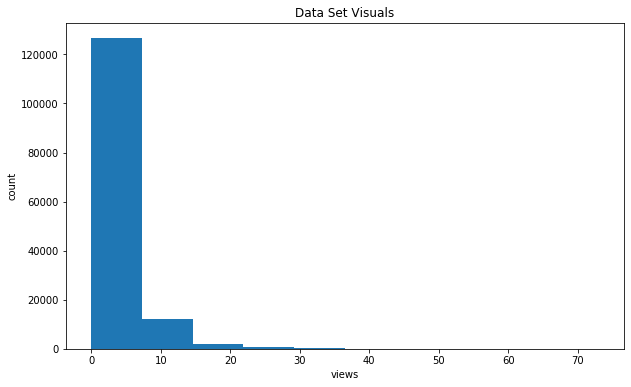

In [5]:
#basic visulization
plt.figure(figsize=(10, 6))
plt.hist(dataset.Answers)
plt.title('Data Set Visuals')
plt.xlabel('views')
plt.ylabel('count')
plt.show()

In [6]:
#assumption Username, ID does not affect the number of upvotes

Y = dataset.Answers
X = dataset.iloc[:,[2,5]]

print(X)

        Reputation    Views
0           5645.0  33200.0
1          24511.0   2730.0
2            927.0  21167.0
3             21.0  18528.0
4           4475.0  57240.0
...            ...      ...
141443      4681.0   2469.0
141444      7782.0  18998.0
141445       435.0  57048.0
141446       176.0  10193.0
141447       648.0  12785.0

[141448 rows x 2 columns]


In [7]:
W = np.zeros((X.shape[1]+1,1))
print(W)

[[0.]
 [0.]
 [0.]]


In [8]:
#Normaliztaion
def normalize(x, mode='std'):
    N = x.shape[0]
    
    x_mean = np.mean(x, axis=0)
    if mode=='std':
        x_std = np.std(x, axis=0)
    else:
        x_std = np.max(x, axis =0)
    
    x = (x-x_mean)/x_std
    
    arr = np.ones((N, 1))
    x = np.hstack((arr, x))
    #print(x)
    return x

In [9]:
#testing normalization 
np.random.seed(0)
x = np.random.rand(5,5)
x = normalize(x, mode='std')
print(x.shape)
print(x)

(5, 6)
[[ 1.         -0.20602098  0.78951027 -0.41884901 -1.72218407  0.17681922]
 [ 1.          0.11854592 -0.22998031  1.34645231  1.12080062  0.03565705]
 [ 1.          0.6060984   0.10534616 -0.6309152   0.86237971 -1.06099139]
 [ 1.         -1.74955693 -1.76276226  0.98513859 -0.13855101  1.74368392]
 [ 1.          1.23093358  1.09788614 -1.28182669 -0.12244524 -0.8951688 ]]


In [10]:
# now comes cost calculation method
def cal_cost(x,y,w):
    
    n = x.shape[0]
    y_hat = np.dot(x, w)
    cost = np.sum((y_hat-y)**2)/(2*n)
    return cost

In [11]:
np.random.seed(0)
x_test = np.random.rand(5,5)
y_test = np.random.rand(5,1)
w_test = np.random.rand(6,1)

x_test = normalize(x_test)
cost = cal_cost(x_test, y_test, w_test)
print(cost)

0.2911040132454302


In [12]:
#time for the gradient descent

def gradient(x, y, w, iterations, learning_rate):
    n = x.shape[0]
    j = []
    initial_cost = cal_cost(x, y, w)
    j.append(initial_cost)
    
    for i in range (iterations):
        y_hat = np.dot(x, w)
        print(i)
        w = w - ((learning_rate/(2*n))*(np.dot(x.T, (y_hat-y))))
        
        cost = cal_cost(x, y, w)
        j.append(cost)
        
    return (w, j)
    

In [13]:
np.random.seed(0)
x_test = np.random.rand(5,5)
y_test = np.random.rand(5,1)
w_test = np.random.rand(6,1)
x_test = normalize(x_test)

w_test, j_test = gradient(x_test, y_test, w_test, 1000, 0.001)
print("Initial cost==> {}".format(j_test[0]))
print("Final cost==> {}".format(j_test[-1]))
print("Weights after updation==> {}".format(w_test))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [14]:
print(X)
X = normalize(X)
Y = np.expand_dims(Y, axis=1)
W, J = gradient(X, Y, W, 10000, 0.0001)


        Reputation    Views
0           5645.0  33200.0
1          24511.0   2730.0
2            927.0  21167.0
3             21.0  18528.0
4           4475.0  57240.0
...            ...      ...
141443      4681.0   2469.0
141444      7782.0  18998.0
141445       435.0  57048.0
141446       176.0  10193.0
141447       648.0  12785.0

[141448 rows x 2 columns]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186

1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993


3439
3440
3441
3442
3443
3444
3445
3446
3447
3448
3449
3450
3451
3452
3453
3454
3455
3456
3457
3458
3459
3460
3461
3462
3463
3464
3465
3466
3467
3468
3469
3470
3471
3472
3473
3474
3475
3476
3477
3478
3479
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638


5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295


6745
6746
6747
6748
6749
6750
6751
6752
6753
6754
6755
6756
6757
6758
6759
6760
6761
6762
6763
6764
6765
6766
6767
6768
6769
6770
6771
6772
6773
6774
6775
6776
6777
6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944


8385
8386
8387
8388
8389
8390
8391
8392
8393
8394
8395
8396
8397
8398
8399
8400
8401
8402
8403
8404
8405
8406
8407
8408
8409
8410
8411
8412
8413
8414
8415
8416
8417
8418
8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584


Text(0.5, 1.0, 'convergence graph of cost function')

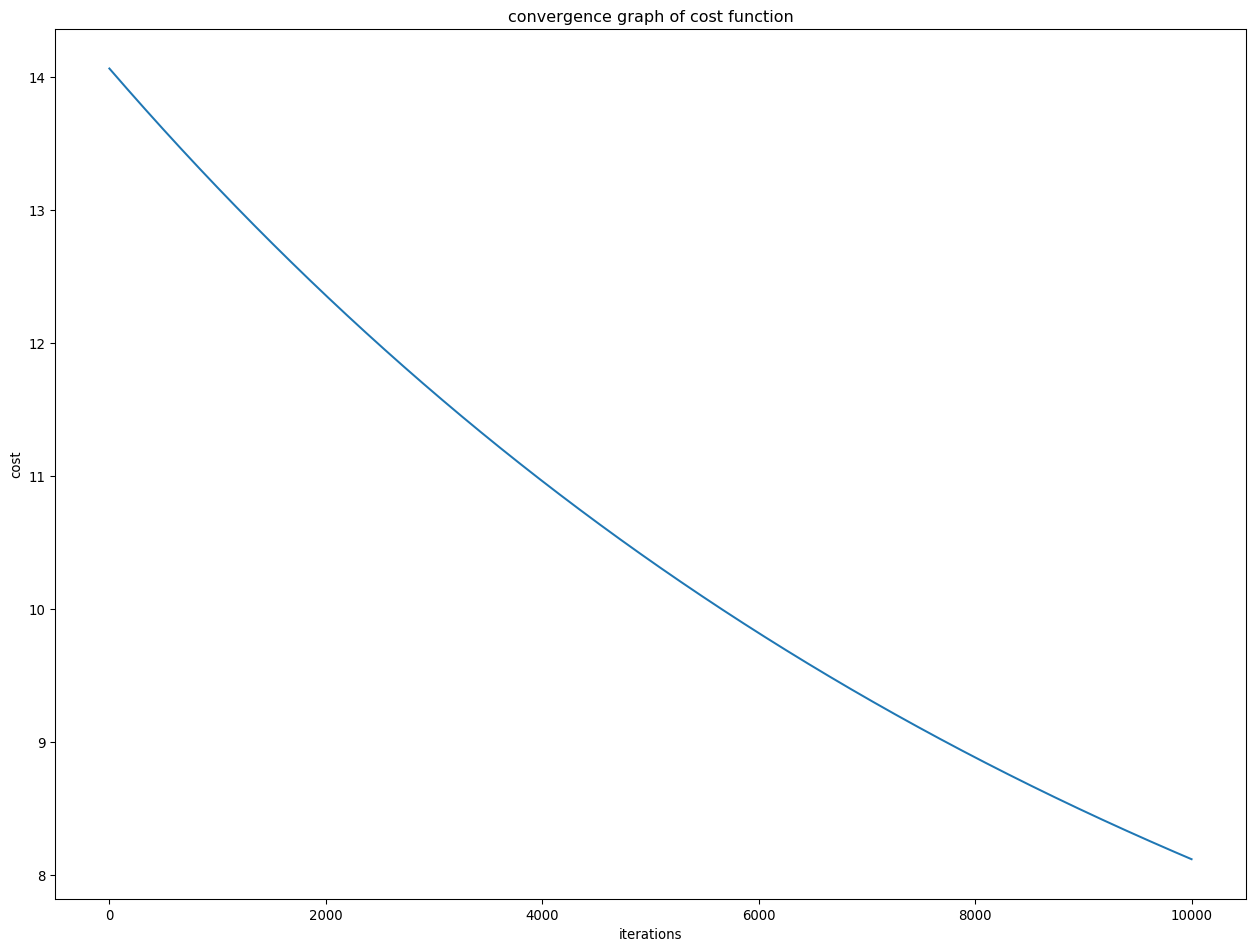

In [16]:
t = np.arange(10000 + 1)

plt.figure(figsize = (16,12),dpi = 96)
plt.plot(t,J)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.title('convergence graph of cost function')

In [18]:
print('Initial cost = {}'.format(J[0]))
print('final cost = {}'.format(J[-1]))

Initial cost = 14.06218186188564
final cost = 8.119890571551208


In [19]:
def score(x,y,w):
    x = normalize(x)
    y = np.expand_dims(y,axis = 1)
    
    y_hat = np.dot(x,w)
    score = 1.0 - ((np.sum((y - y_hat)**2))/(np.sum((y - np.mean(y))**2)))
    return score

In [20]:
dataset1 = pd.read_csv(r"C:\Users\Gray\Desktop\100_Days_ML_CODE\Linear Regression\test_8i3B3FC.csv")
Y_test = dataset1.Answers
X_test = dataset1.iloc[:,[2,5]]
W = np.zeros((X_test.shape[1]+1,1))

s = score(X_test,Y_test,W)
print('score of the system is : {}'.format(s))

score of the system is : -1.197536844232531
